# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Шаг 1. Загрузка данных**

**Шаг 2. Предобработка данных**
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
  - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
  - Опишите причины, которые могли привести к пропускам;
  - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;  
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3. Исследовательский анализ данных**
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверьте гипотезы.**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.

Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Шаг 6. Вывод.**

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Шаг 1. Загрузка данных**

Импортируем бибилиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

Загрузим CSV-файл с данными:

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Посмотрим из каких значений состоит файл:**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**В данных 16715 строк, однако есть проблемы с типом данных и их качеством:**

Name - присутствуют пропущенные значения.

Year_Of_Release - данные типа float64 необходимо привести к нужному типу данных, присутствуют пропущенные значения.

Critic_Score - присутствуют пропущенные значения.

User_Score - данные типа object необходимо привести к нужному типу данных, присутствуют пропущенные значения.

Rating - присутствуют пропущенные значения.

**Вывод:** Импортированы необходимые библиотеки, загружены данные, определены цели для последующей предобработки данных.

**Шаг 2. Предобработка данных.**

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
  - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
  - Опишите причины, которые могли привести к пропускам;
  - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;  
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Распечатаем таблицу для удобства ориентирования

In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
data_shape_original = data.shape

**Для начала для удобства заменим все названия столбцов на строчные:**

In [6]:
data.columns = data.columns.str.lower()

Проверим данные на наличие пропущенных значений в стобцах

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


**2.1.Заменим типы данных и прорабатаем пропущенные значения:**

Столбец **name**:

In [8]:
data['name'].isna().sum()

2

В столбце name всего лишь 2 пропущенных значений, можно смело отбросить их

In [9]:
data = data.dropna(subset=['name'])

In [10]:
data['name'].isna().sum()

0

Столбец **year_of_release**:

In [11]:
data['year_of_release'].isna().sum()

269

В столбце year_of_release 269 пропущенных значений, заполнить их возможности нет, так как медианное или среднее значение будет некорректно для года выхода игры.

In [12]:
data = data.dropna(subset=['year_of_release'])

In [13]:
data['year_of_release'].isna().sum()

0

Также необходимо привести данные по столбцу year_of_release к нужному типу, в нашем случае это **Int**

In [14]:
data['year_of_release'] = data['year_of_release'].astype('int')

Столбец **user_score**:

In [15]:
data['user_score'].isna().sum()

6605

In [16]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score присутствуют значения **tbd**, расшифровывая это означает **to be determined**, переводя на русский значит **будет определен**. Заменим эти значения на NaN

In [17]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Также заменим тип данных на **float**

In [18]:
data['user_score'] = data['user_score'].astype('float')

Очень много пропусков. Так как заполнение их медианным или средним значением может испортить наши результаты, то заполним их значением -1

In [19]:
data['user_score'] = data['user_score'].fillna(-1)

Столбец **critic_score**:

In [20]:
data['critic_score'].isna().sum()

8461

Проведем ту же самую манипуляцию что и с user_score

In [21]:
data['critic_score'] = data['critic_score'].fillna(-1)

Столбец **rating**:

In [22]:
print(data['rating'].unique())
data['rating'].isna().sum()

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


6676

Заполним пустые значения более корректной формулировкой **Out of rating (Вне рейтинга)**:

In [23]:
data['rating'] = data['rating'].fillna('out of rating')

In [24]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


**Проверим данные на наличие явных дубликатов.**

In [25]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

**Проверим данные на наличие неявных дубликатов.**

In [26]:
data[data[['name','platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Обнаружен неявный дубликат с игрой Madden NFL13. Вторая запись похожа на аномилю. Поэтому оставми первую.

In [27]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first', inplace=True)
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,out of rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,out of rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,out of rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,out of rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,out of rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,out of rating,0.01


In [29]:
print(data_shape_original)
print(data.shape)
(data_shape_original[0] - data.shape[0]) * 100 / data_shape_original[0]

(16715, 11)
(16443, 12)


1.6272808854322465

Потери в данных незначительные. Можно преступать к исследовательскому анализу данных.

**Вывод:** На этапе предобработки данных были проделаны следующие действия:
- В столбце **name** убраны пропущенные значения;
- В столбце **years_of_release** убраны пропущенные значения, а также данные приведены  к типу **int**;
- В столбце **user_score** обработаны пропущенные значения, а также данные приведены  к типу **float**;
- В столбце **critic_score** обработаны пропущенные значения;
- В столбце **rating** обработаны пропущенные значения;
- Осуществлена проверка на явные и неявные дубликаты;
- Добавлен столбец с общими продажами **total_sales**;

Потери при предобработки данных незначительные: **1.62%** данных.

**Шаг 3. Исследовательский анализ данных**

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

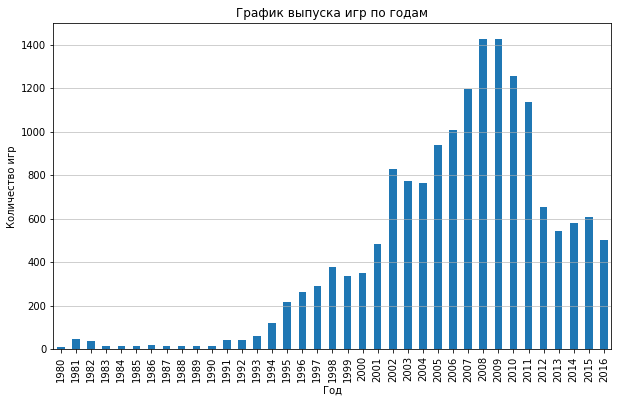

In [30]:
plt.figure(figsize=(10, 6))

years_counts = data['year_of_release'].value_counts().sort_index()

# Постройте столбчатую диаграмму
years_counts.plot(kind='bar')

plt.title('График выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid(axis='y', alpha=0.75)

plt.show()

С 1991 по 2009 годы прослеживалась четкая тенденция на рост количества выпускаемых игр. Однако после 2009 года начался спад вплоть до 2012 года. С 2012 года началась стагнация в годы с 2012 по 2016 выпускалось примерно 550 игр в год. Так как мы прогнозируем рекламную компанию на 2017 год, то нам необходимо наиболее свежие данные.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

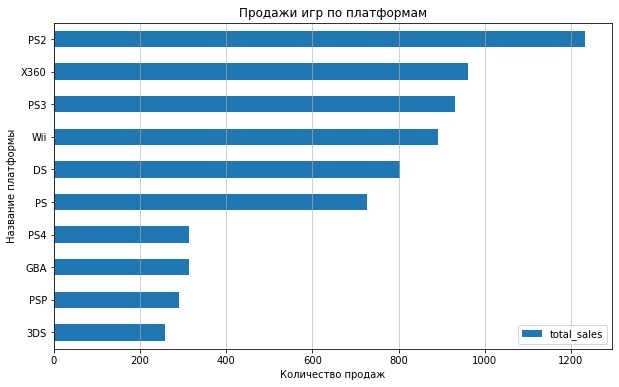

In [31]:
best_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales', ascending=False)\
.head(10)

best_platforms.sort_values(by='total_sales', ascending=True).plot(kind='barh', figsize=(10,6))

plt.title('Продажи игр по платформам')
plt.xlabel('Количество продаж')
plt.ylabel('Название платформы')
plt.grid(axis='x', alpha=0.75)
plt.show()

Самая популярная платформа Playstation 2. В общей сложности в топ вошли 5 приставок от Sony. На 2 месте по количеству платформ в топе компания Nintendo: 4 консоли. И одна консоль от Microsoft, но зато на втором месте XBOX 360.

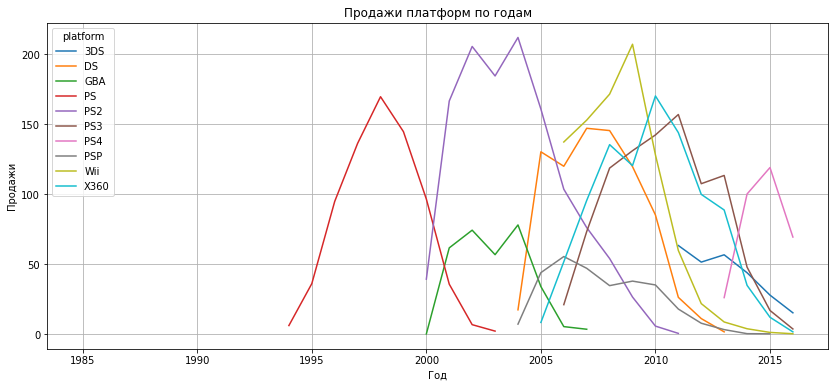

In [32]:
best_platforms_name = best_platforms.index

best_platforms_data = data[data['platform'].isin(best_platforms_name)].pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')

best_platforms_data.plot(figsize=(14, 6))
plt.title('Продажи платформ по годам')
plt.xlabel('Год')
plt.grid(True)
plt.ylabel('Продажи')

plt.show()

Исходя из данных графика можно сказать что жизненный цикл каждой платформы от 7 до 10 лет, после чего появляются новые. Пик платформ приходится обычно на 3 год после выпуска, что вполне логично так как разработчики в начале изучают возможности и особенности платформы, далее идет планомерный спад и выход новой консоли.

**Теперь возьмем данные за актуальный период. Возьмем данные с 2013 по 2016 год.** 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Согласен с выбранным актуальным периодом! </div>

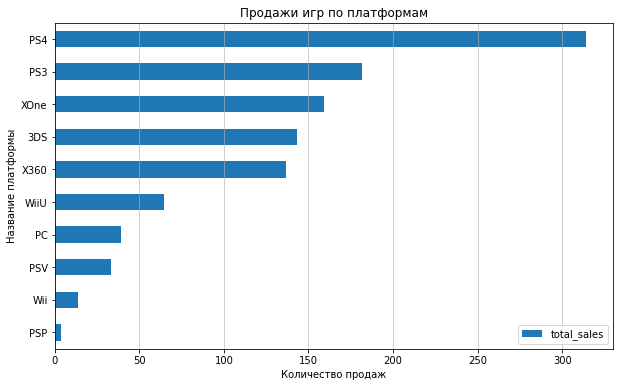

In [33]:
filtered_data = data[data['year_of_release'] >= 2013]

best_actual_platforms = filtered_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales', ascending=False)\
.head(10)

best_actual_platforms.sort_values(by='total_sales', ascending=True).plot(kind='barh', figsize=(10,6))

plt.title('Продажи игр по платформам')
plt.xlabel('Количество продаж')
plt.ylabel('Название платформы')
plt.grid(axis='x', alpha=0.75)
plt.show()

Если сравнивать с графиком за все годы то картина в целом не изменилось. На первом месте была PS2, а стала новая версия PS4, на втором месте также XBOX, только уже не XBOX360, а XBOXOne.

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

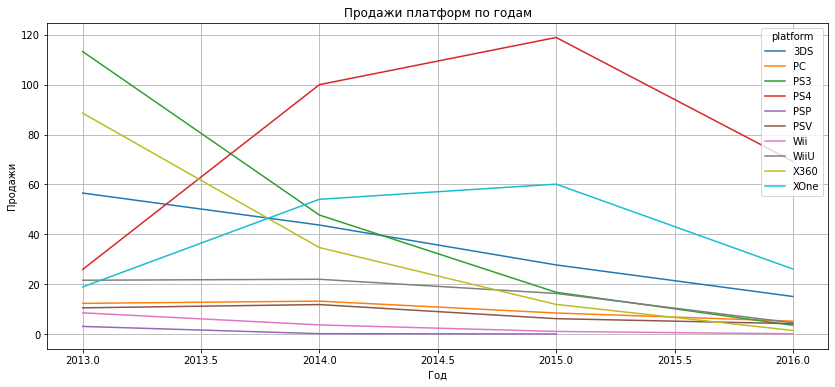

In [34]:
best_actual_platforms_name = best_actual_platforms.index

best_platforms_data = filtered_data[filtered_data['platform'].isin(best_actual_platforms_name)].pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')

best_platforms_data.plot(figsize=(14, 6))
plt.title('Продажи платформ по годам')
plt.xlabel('Год')
plt.grid(True)
plt.ylabel('Продажи')

plt.show()

Как видно из графика продажи для всех платформ снижаются, это общий тренд рынка. Исходя из графика можно сделать выводы, что потенциально прибыльными платформами можно назвать:
- **Sony Playstation 4.**
- **Xbox one**
- **Nintendo 3DS**

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

Text(0, 0.5, 'Продажи')

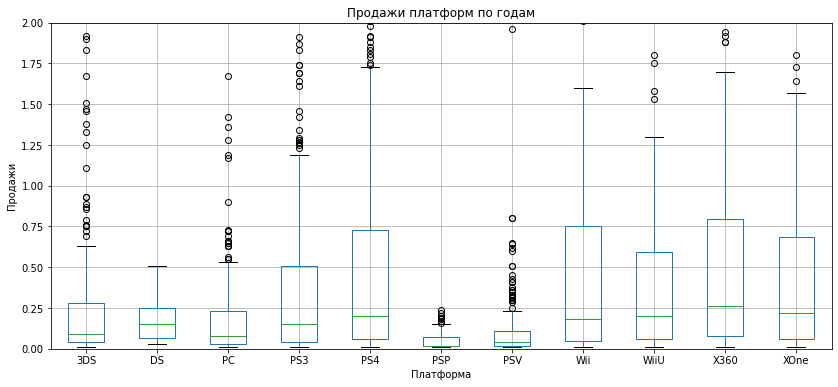

In [35]:
filtered_data.pivot_table(index='name', values='total_sales', columns='platform', aggfunc='sum') \
.plot(kind='box', ylim=(0, 2), figsize=(14, 6))

plt.title('Продажи платформ по годам')
plt.xlabel('Платформа')
plt.grid(True)
plt.ylabel('Продажи')

Из ящика с усами можно сделать вывод, что наиболее актуальными платформами на данный момент являются PS4, XOne, WiiU. Межквартильный размах у PS4 и XOne примерно одинаковый однако у PS4 больше выбросов, скорей всего это количество эксклюзивных игр. У WiiU впринципе отсутствуют выбросы.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

Для примера возьмем самую популярную на данный момент платформу PS4.

In [36]:
# код ревьюера

print(filtered_data[(filtered_data['platform'] == 'PS4') & (filtered_data['critic_score'] > -1) & (filtered_data['user_score'] > -1)].shape[0])
print(filtered_data[(filtered_data['platform'] == 'PS4') & (filtered_data['critic_score'] > -1)].shape[0])
print(filtered_data[(filtered_data['platform'] == 'PS4') & (filtered_data['user_score'] > -1)].shape[0])

249
252
257


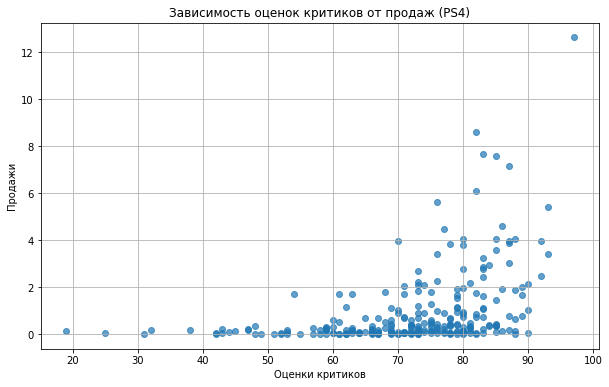

Корреляция между оценками критиков и продажами: 0.41


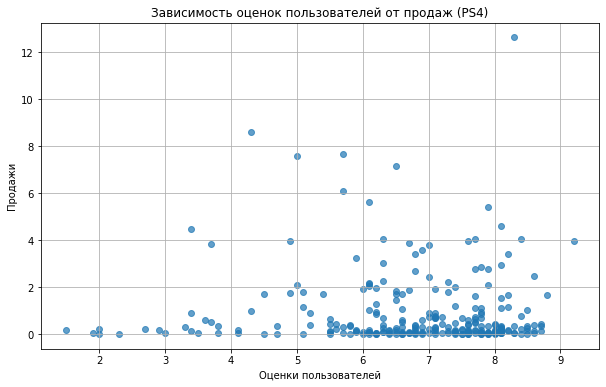

Корреляция между оценками пользователей и продажами: -0.03


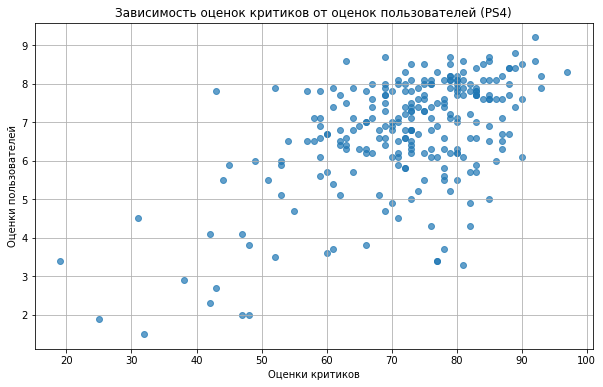

Корреляция между оценками критиков и оценкой пользователей: 0.56


In [37]:
PS4_critic = filtered_data[(filtered_data['platform'] == 'PS4') & (filtered_data['critic_score'] > -1)]
PS4_user = filtered_data[(filtered_data['platform'] == 'PS4') & (filtered_data['user_score'] > -1)]
PS4_overall = filtered_data[(filtered_data['platform'] == 'PS4') & (filtered_data['user_score'] > -1) & (filtered_data['critic_score'] > -1)]

plt.figure(figsize=(10, 6))
plt.scatter(PS4_critic['critic_score'], PS4_critic['total_sales'], alpha=0.7)
plt.title('Зависимость оценок критиков от продаж (PS4)')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = PS4_critic['critic_score'].corr(PS4_critic['total_sales'])
print(f'Корреляция между оценками критиков и продажами: {correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(PS4_user['user_score'], PS4_user['total_sales'], alpha=0.7)
plt.title('Зависимость оценок пользователей от продаж (PS4)')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = PS4_user['user_score'].corr(PS4_user['total_sales'])
print(f'Корреляция между оценками пользователей и продажами: {correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(PS4_overall['critic_score'], PS4_overall['user_score'], alpha=0.7)
plt.title('Зависимость оценок критиков от оценок пользователей (PS4)')
plt.xlabel('Оценки критиков')
plt.ylabel('Оценки пользователей')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = PS4_overall['critic_score'].corr(PS4_overall['user_score'])
print(f'Корреляция между оценками критиков и оценкой пользователей: {correlation:.2f}')

Исходя из данных корелляции можно сделать вывод что оценка критиков имеет значительной влияние на продажи, в отличии от оценок пользователей где корреляция практически нулевая. Однако на оценку пользователей влияет оценка критиков.

**Соотнесите выводы с продажами игр на других платформах.**

Сравним с информацией по другой платформе XOne.

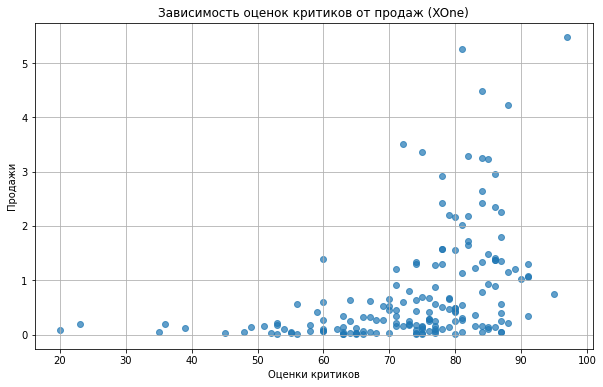

Корреляция между оценками критиков и продажами: 0.42


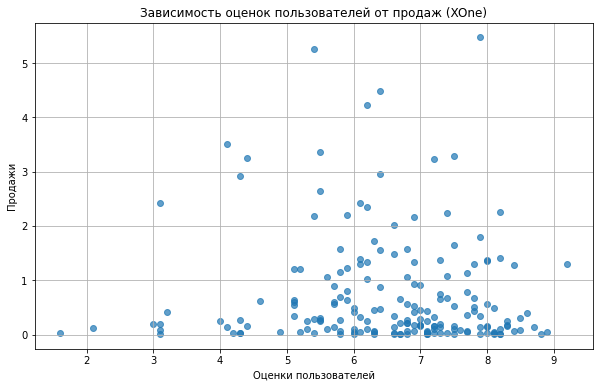

Корреляция между оценками пользователей и продажами: -0.07


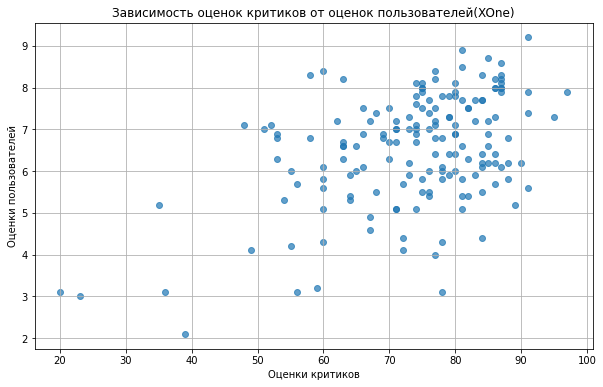

Корреляция между оценками критиков и оценкой пользователей: 0.47


In [38]:
XOne_critic = filtered_data[(filtered_data['platform'] == 'XOne') & (filtered_data['critic_score'] > -1)]
XOne_user = filtered_data[(filtered_data['platform'] == 'XOne') & (filtered_data['user_score'] > -1)]
XOne_overall = filtered_data[(filtered_data['platform'] == 'XOne') & (filtered_data['user_score'] > -1) & (filtered_data['critic_score'] > -1)]

plt.figure(figsize=(10, 6))
plt.scatter(XOne_critic['critic_score'], XOne_critic['total_sales'], alpha=0.7)
plt.title('Зависимость оценок критиков от продаж (XOne)')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = XOne_critic['critic_score'].corr(XOne_critic['total_sales'])
print(f'Корреляция между оценками критиков и продажами: {correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(XOne_user['user_score'], XOne_user['total_sales'], alpha=0.7)
plt.title('Зависимость оценок пользователей от продаж (XOne)')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = XOne_user['user_score'].corr(XOne_user['total_sales'])
print(f'Корреляция между оценками пользователей и продажами: {correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(XOne_overall['critic_score'], XOne_overall['user_score'], alpha=0.7)
plt.title('Зависимость оценок критиков от оценок пользователей(XOne)')
plt.xlabel('Оценки критиков')
plt.ylabel('Оценки пользователей')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = XOne_overall['critic_score'].corr(XOne_overall['user_score'])
print(f'Корреляция между оценками критиков и оценкой пользователей: {correlation:.2f}')

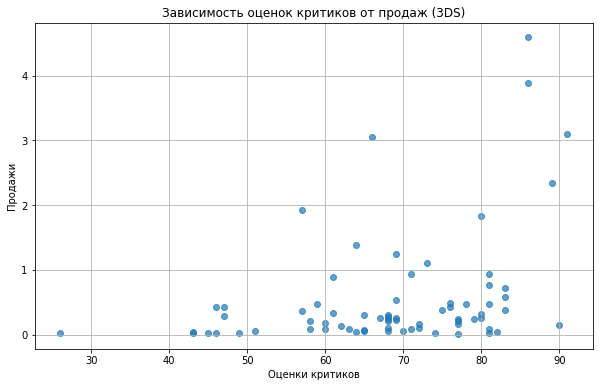

Корреляция между оценками критиков и продажами: 0.36


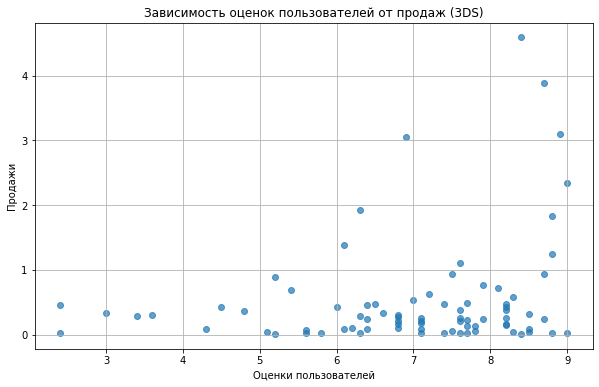

Корреляция между оценками пользователей и продажами: 0.24


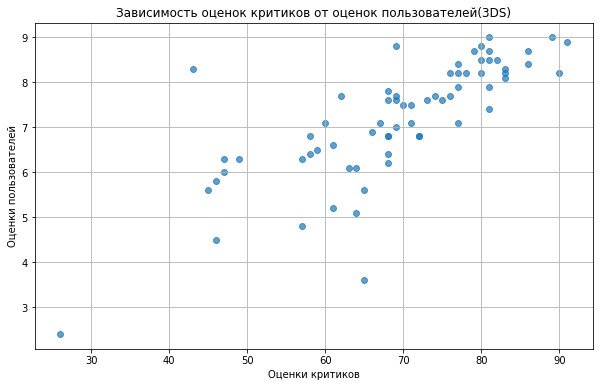

Корреляция между оценками критиков и оценкой пользователей: 0.77


In [39]:
ThreeDS_critic = filtered_data[(filtered_data['platform'] == '3DS') & (filtered_data['critic_score'] > -1)]
ThreeDS_user = filtered_data[(filtered_data['platform'] == '3DS') & (filtered_data['user_score'] > -1)]
ThreeDS_overall = filtered_data[(filtered_data['platform'] == '3DS') & (filtered_data['user_score'] > -1) & (filtered_data['critic_score'] > -1)]

plt.figure(figsize=(10, 6))
plt.scatter(ThreeDS_critic['critic_score'], ThreeDS_critic['total_sales'], alpha=0.7)
plt.title('Зависимость оценок критиков от продаж (3DS)')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = ThreeDS_critic['critic_score'].corr(ThreeDS_critic['total_sales'])
print(f'Корреляция между оценками критиков и продажами: {correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(ThreeDS_user['user_score'], ThreeDS_user['total_sales'], alpha=0.7)
plt.title('Зависимость оценок пользователей от продаж (3DS)')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = ThreeDS_user['user_score'].corr(ThreeDS_user['total_sales'])
print(f'Корреляция между оценками пользователей и продажами: {correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(ThreeDS_overall['critic_score'], ThreeDS_overall['user_score'], alpha=0.7)
plt.title('Зависимость оценок критиков от оценок пользователей(3DS)')
plt.xlabel('Оценки критиков')
plt.ylabel('Оценки пользователей')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = ThreeDS_overall['critic_score'].corr(ThreeDS_overall['user_score'])
print(f'Корреляция между оценками критиков и оценкой пользователей: {correlation:.2f}')

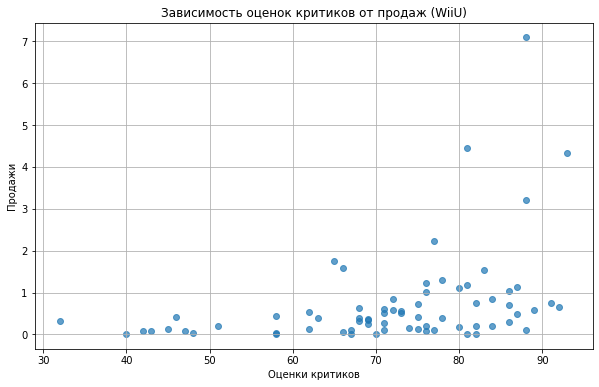

Корреляция между оценками критиков и продажами: 0.38


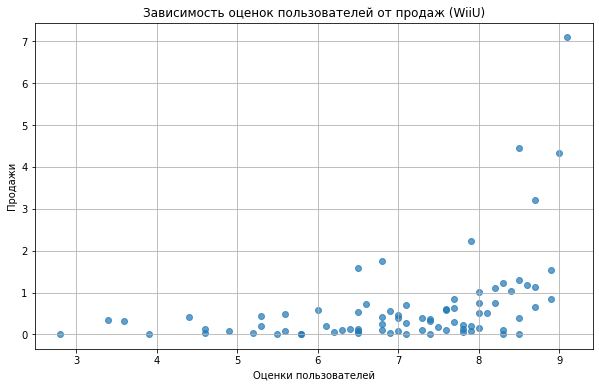

Корреляция между оценками пользователей и продажами: 0.42


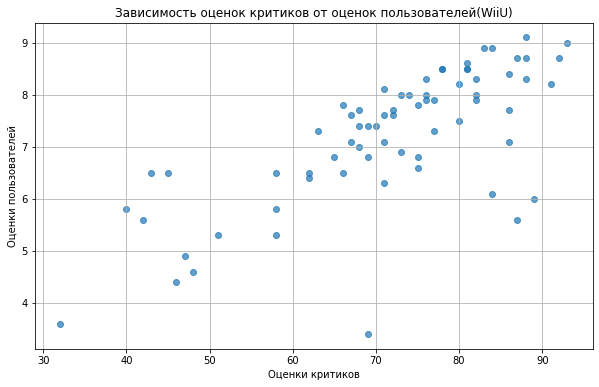

Корреляция между оценками критиков и оценкой пользователей: 0.72


In [40]:
WiiU_critic = filtered_data[(filtered_data['platform'] == 'WiiU') & (filtered_data['critic_score'] > -1)]
WiiU_user = filtered_data[(filtered_data['platform'] == 'WiiU') & (filtered_data['user_score'] > -1)]
WiiU_overall = filtered_data[(filtered_data['platform'] == 'WiiU') & (filtered_data['user_score'] > -1) & (filtered_data['critic_score'] > -1)]

plt.figure(figsize=(10, 6))
plt.scatter(WiiU_critic['critic_score'], WiiU_critic['total_sales'], alpha=0.7)
plt.title('Зависимость оценок критиков от продаж (WiiU)')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = WiiU_critic['critic_score'].corr(WiiU_critic['total_sales'])
print(f'Корреляция между оценками критиков и продажами: {correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(WiiU_user['user_score'], WiiU_user['total_sales'], alpha=0.7)
plt.title('Зависимость оценок пользователей от продаж (WiiU)')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = WiiU_user['user_score'].corr(WiiU_user['total_sales'])
print(f'Корреляция между оценками пользователей и продажами: {correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(WiiU_overall['critic_score'], WiiU_overall['user_score'], alpha=0.7)
plt.title('Зависимость оценок критиков от оценок пользователей(WiiU)')
plt.xlabel('Оценки критиков')
plt.ylabel('Оценки пользователей')
plt.grid(True)

plt.show()

# Рассчитаем корреляцию
correlation = WiiU_overall['critic_score'].corr(WiiU_overall['user_score'])
print(f'Корреляция между оценками критиков и оценкой пользователей: {correlation:.2f}')

Корреляция для XOne практически идентична с PS4. Для платформ данного типа можно сделать вывод что влияние оценок критиков на продажи выосоко, а оценки пользователей практически не влияют на продажи. Для платформ от Nintendo ситуация другая, оценки критиков и пользователей практически в равной значимости влияют на продажи, однако корелляция несуществена.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

Рассмотрим данные за все годы и за актуальные для анализа годы. Проанализируем изменились ли тренды.

<function matplotlib.pyplot.show(close=None, block=None)>

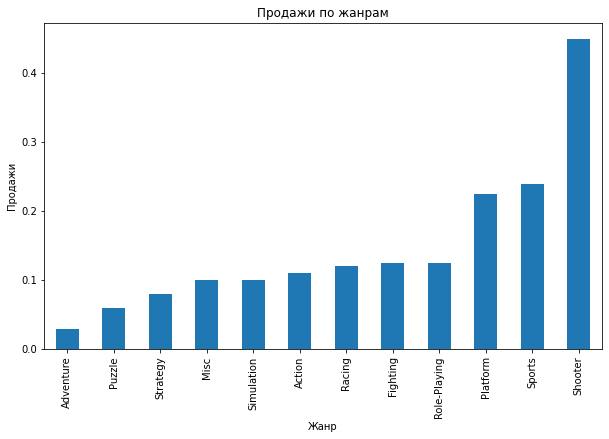

In [41]:
genre_sales = filtered_data.groupby('genre')['total_sales'].median()
genre_sales = genre_sales.sort_values()

#Построим столбчатую диаграмму:

plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar')
plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

plt.show

Наиболее популярными жанрами являются: Shooter, Sports, Platform. На эти 3 жанра приходится 80% продаж игр. Самые низкие продажи по: Strategy, Adventure, Puzzle.

**Вывод:** В исследовательской части проекта были проанализированы следующие темы и сделаны выводы:

- Проанализирован выпуск игр по годам. Оценка исторических данных особо важна для отслеживания трендов. На данный момент наблюдается стагнация и выпускается примерно одинаковое количество игр на протяжении 4 лет. Для анализа на 2017 год эта информация наиболее важна
- Самые популярны платформы за весь рассматриваемый период:
    - PS2;
    - XBOX360;
    - PS3.
- Самые популярные платформы на данный момент:
    - PS4;
    - PS3;
    - XOne.

- Жизненный цикл платформы в среднем **от 7 до 10 лет.**
- Лидируют по прадажам следующие платформы:
    - XOne;
    - PS4;
    - WiiU.    
- Прослеживается общий тренд на снижение продаж.
- Наибольший вес на продажи составляют оценки критиков. **41% по PS4**. А также оценки критиков влияют и на оценки пользователей.
- Наиболее популярные жанрами являются:
    - Shooter;
    - Sports;
    - Platform.
- Наименее популярными жанрами являются:
    - Strategy;
    - Adventure;
    - Puzzle.

**Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Самые популярные платформы (топ-5). Опишите различия в долях продаж для каждого региона.**

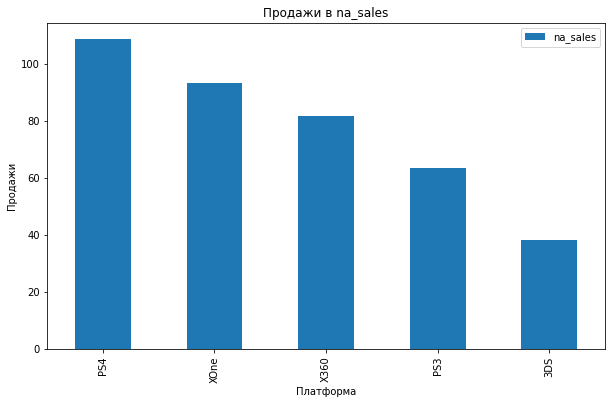

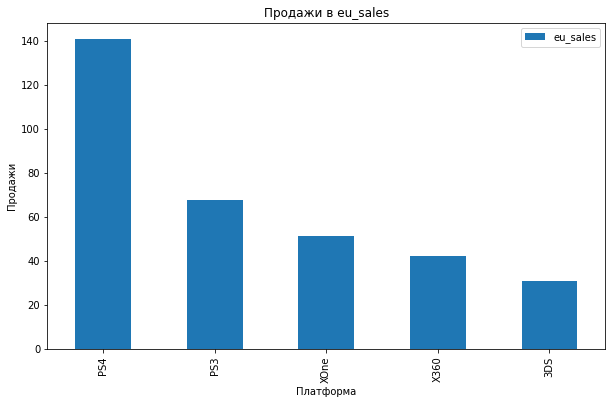

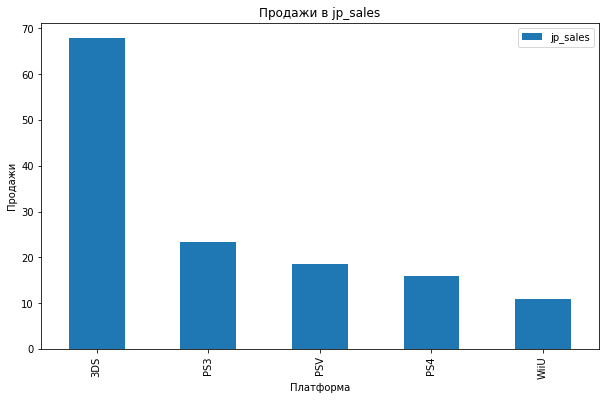

In [42]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    region_data_sales = filtered_data.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head(5)
    region_data_sales.plot(kind='bar', figsize=(10,6))
    plt.title(f'Продажи в {region}')
    plt.xlabel('Платформа')
    plt.ylabel('Продажи')
    plt.show()

Для Европы и США самой популярной приставкой является PS4. На графиках видно, что пользователи из Европы больше отдают предпочтение приставкам от Sony, тогда как в Северной Америке более популярны приставки от Microsoft. В Японии топ открывает приставка от Nintendo, неудивительно ведь Nintendo это японская компания и Она точно знает, какие предпочтения у своих пользователей.

**Самые популярные жанры (топ-5) в каждом регионе.**

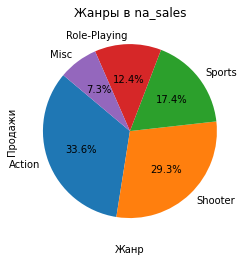

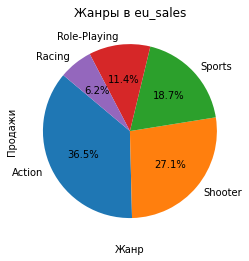

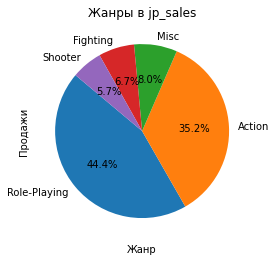

In [43]:
for region_genres in regions:
    region_data_genre = filtered_data.pivot_table(index='genre', values=region_genres, aggfunc='sum').sort_values(by=region_genres, ascending=False).head(5)
    plt.pie(region_data_genre[region_genres], labels=region_data_genre.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Жанры в {region_genres}')
    plt.xlabel('Жанр')
    plt.ylabel('Продажи')
    plt.show()

На графиках видно что интересы пользователей в Европе и Северной Америке совпадают, любимые жанры для данных регионов:

   - Action;
   - Shooter;
   - Sports.

Япония же совершенно отличается по интересам, любимые жанры у людей из этой страны следующие:

   - Role-Playing;
   - Action;
   - Misc

**Влияет ли рейтинг ESRB на продажи в отдельном регионе.**

Для начала разберем что значат буквы из рейтинга ESRB:

**E:** Для всех;

**K-A**: Для всех (так назывался до E);

**EC:** Для детей старше 3 лет;

**E10+:** Для детей от 10 лет;

**T:** Для лиц от 13 лет;

**M:** Для взрослых;

**AO:** Только для взрослых;

**RP:** Рейтинг ожидается.

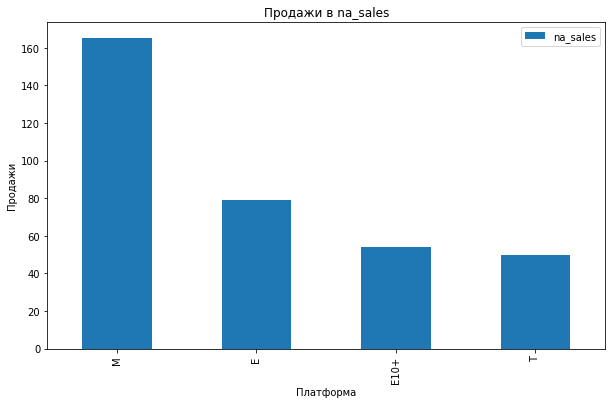

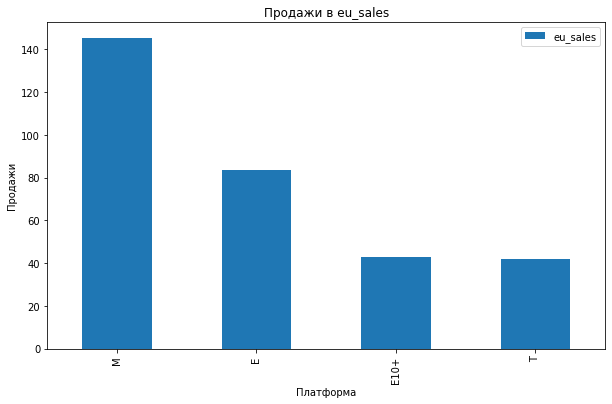

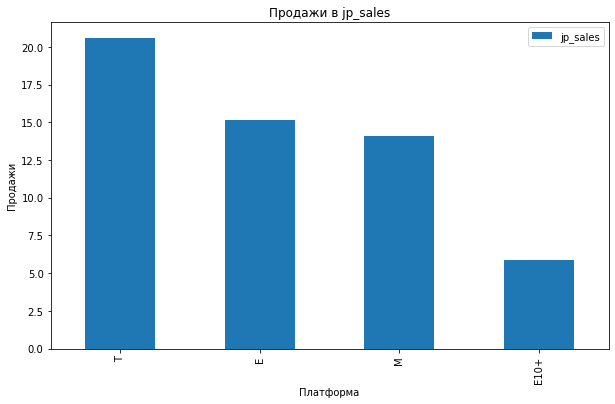

In [44]:
rating_data = filtered_data[filtered_data['rating'] != 'out of rating']
for region_rating in regions:
    region_data_rating = rating_data.pivot_table(index='rating', values=region_rating, aggfunc='sum').sort_values(by=region_rating, ascending=False).head(5)
    region_data_rating.plot(kind='bar', figsize=(10,6))
    plt.title(f'Продажи в {region_rating}')
    plt.xlabel('Платформа')
    plt.ylabel('Продажи')
    plt.show()

Картина для Европы и Северной Америки идентична:
    
**M:** Для взрослых;
**E:** Для всех;
**E10+:** Для детей от 10 лет;
**T:** Для лиц от 13 лет.

Япония более самобытна и в этом вопросе, самые популярные жанры:

**T:** Для лиц от 13 лет.
**E:** Для всех;
**M:** Для взрослых;
**E10+:** Для детей от 10 лет;

Неудивительно, что в Японии именно такие возрастные рейтинги. Так как самая популярная приставка от Nintendo, где возрастная категория игр для более широкого круга пользователей, нежели чем в Playstation и Xbox

**Вывод:** Пользовательские предпочтения для людей из Европы и Северной Америки очень похожи,  в отличие от Японии.:
        
Самая популярная приставка для Европы и Северной Америки: **PS4**

Самая популярная приставка для Японии: **Nintendo 3DS**

Самые популярные жанры для Европы и Северной Америки: **Action, Shooter, Sports.**

Самые популярные жанры для Японии: **Role-Playing, Action,Misc.**

Наибольшее популярная категория игр в Европе и Северной Америки: **Для взрослых (M)**

Наибольшее популярная категория игр в Японии: **Для подростков**

**Шаг 5. Проверьте гипотезы.**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

**Нулевая гипотеза (H0):** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза (H1):** Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые.

Установим уровень статистической значимости **5%**

In [45]:
actual_data = filtered_data[(filtered_data['user_score'] > -1)]

xone_data = actual_data[actual_data['platform'] == 'XOne']['user_score']
pc_data = actual_data[actual_data['platform'] == 'PC']['user_score']

alpha = 0.05

results = st.ttest_ind(xone_data, pc_data, equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.14759594013430463
Не удалось отвергнуть нулевую гипотезу


Мы не можем отвергнуть нулевую гипотезу так как, c большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

**Нулевая гипотеза (H0):** Средние пользовательские рейтинги  рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза (H1):** Средние пользовательские рейтинги платформ Xbox One и PC разные.

Установим уровень статистической значимости **5%**

In [46]:
action_data = actual_data[actual_data['genre'] == 'Action']['user_score']
sports_data = actual_data[actual_data['genre'] == 'Sports']['user_score']

alpha = 0.05

results_1 = st.ttest_ind(action_data, sports_data, equal_var=False)

print(results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу так как с вероятно средние пользовательские рейтинги  рейтинги жанров Action и Sports действительно разные.

**Шаг 6. Вывод.**

В результате работы были исследованы исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Цель работы была выявит определяющие успешность игры закономерности. В целях определения популярных продуктов и спланировать рекламные кампании. Рассматривался актуальный период с 2013-2016 год. По ходу работы были сделаны следующие выводы:

1. Произведена загрузка данных. Загружены необходимые библиотеки.
2. Осуществлена предобработка данных. Обработаны пропущенны значения, изменены типы данных где это было необходимо. Потери при предобработки данных незначительные: **1.62%** данных.
3. Проведен исследовательский анализ данных:

- Самые популярны платформы за весь рассматриваемый период:
    - PS2;
    - XBOX360;
    - PS3.
- Самые популярные платформы на данный момент(2013-2016):
    - PS4;
    - PS3;
    - XOne.

- Жизненный цикл платформы в среднем **от 7 до 10 лет.**
- Лидируют по прадажам следующие платформы:
    - XOne;
    - PS4;
    - WiiU.
    
- Прослеживается общий тренд на снижение продаж.
- Наибольший вес на продажи составляют оценки критиков. **41% по PS4**. А также оценки критиков влияют и на оценки пользователей.
- Наиболее популярные жанрами являются:
    - Shooter;
    - Sports;
    - Platform.
- Наименее популярными жанрами являются:
    - Strategy;
    - Adventure;
    - Puzzle.
4. Пользовательские предпочтения для людей из Европы и Северной Америки очень похожи,  в отличие от Японии.:
        
- Самая популярная приставка для Европы и Северной Америки: **PS4**

- Самая популярная приставка для Японии: **Nintendo 3DS**

- Самые популярные жанры для Европы и Северной Америки: **Action, Shooter, Sports.**

- Самые популярные жанры для Японии: **Role-Playing, Action,Misc.**

- Наибольшее популярная категория игр в Европе и Северной Америки: **Для взрослых (M)**

- Наибольшее популярная категория игр в Японии: **Для подростков**

5. Проведена проверка гипотез.

**Итог:** В данной работе приведены данные, необходимые для прогнозирования будущих рекламных компаний. В целях развития магазину "Стримчик" необходимо для себя выбрать стратегию развития, ориентируется ли он на западный рынок(рынок Европы и Северной Америки) или на Японию. Так как эти рынки очень отличаются. Также данная работа поможет определить какие платформы на данный момент актуальны.